# Exercice 1 {-}
## Reading, showing and saving images {-}

In [1]:
import cv2
import numpy as np
from PIL import Image, ImageOps
from matplotlib import pyplot as plt

In [2]:
# Reading the image
lena = Image.open('lena.png')

In [3]:
# Image format, size and mode
print(f'Image Format: {lena.format}')
print(f'Image Size: {lena.size}')
print(f'Image Mode: {lena.mode}')

Image Format: PNG
Image Size: (512, 512)
Image Mode: RGB


In [4]:
# Image dimensions
print(f'Dimensions :')
print(f'width: {lena.height}')
print(f'height: {lena.width}')

Dimensions :
width: 512
height: 512


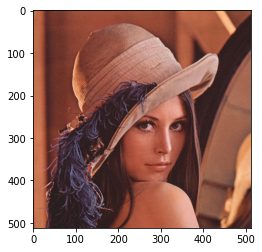

In [5]:
# Showing the image 
plt.imshow(lena)

In [6]:
# Value of pixel [20, 32] 

# Using Pillow
r, g, b = lena.getpixel((20, 32))
print('Valeur du pixel [20, 32]: ')
print(f'R: {r} \nG: {g} \nB: {b}')

# Using Numpy
r, g, b = np.array(lena)[32, 20]

Valeur du pixel [20, 32]: 
R: 171 
G: 86 
B: 57


In [7]:
# Number of pixels
pixels = lena.width * lena.height
print(f'Lena image has {pixels} pixels')

Lena image has 262144 pixels


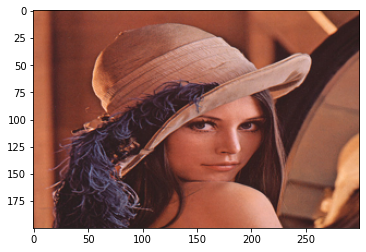

In [8]:
# Resizing the image to 300*200
lena_resized = lena.resize((300, 200))
lena_resized.save('lena_resized.png')
plt.imshow(lena_resized)

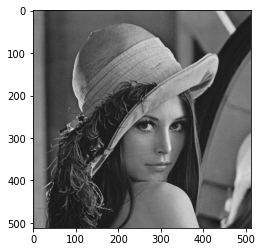

In [9]:
# Converting the image to greyscale
lena_grey = lena.convert('L')
lena_grey.save('lena_greyscale.png')
plt.imshow(lena_grey, cmap='gray')

In [10]:
# Min and Max intensity and intensity mean 

# Using Pillow
min_intensity, max_intensity = lena_grey.getextrema()

mean = 0
for i in range(lena_grey.width): 
    for j in range(lena_grey.height):
        mean += lena_grey.getpixel((i, j))

mean /= lena_grey.width * lena_grey.height

# Using Numpy
lena_array = np.array(lena_grey)
print(f'Min intensity: {lena_array.min()}')
print(f'Max intensity: {lena_array.max()}')
print(f'Mean: {round(lena_array.mean(), 2)}')


Min intensity: 10
Max intensity: 241
Mean: 95.66


True

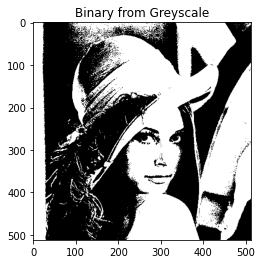

In [11]:
# Binary image
lena_grey = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
ret, thresh = cv2.threshold(lena_grey, mean, 255, cv2.THRESH_BINARY)
plt.title("Binary from Greyscale")
plt.imshow(thresh, cmap='gray')
cv2.imwrite('lena_binary.png', thresh)

# Exercice 2 {-}
## Converting images {-}

In [12]:
lena = cv2.imread('lena.png')

In [13]:
# Converting to Greyscale, RGB, HSV, LAB
lena_greyscale = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
lena_lab = cv2.cvtColor(lena, cv2.COLOR_BGR2LAB)

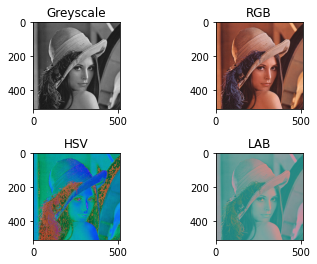

In [14]:
# Showing converted images 
figure, axes = plt.subplots(2, 2)

axes[0][0].set_title('Greyscale')
axes[0][0].imshow(lena_greyscale, cmap='gray')

axes[0][1].set_title('RGB')
axes[0][1].imshow(lena_rgb)

axes[1][0].set_title('HSV')
axes[1][0].imshow(lena_hsv)

axes[1][1].set_title('LAB')
axes[1][1].imshow(lena_lab)

plt.subplots_adjust(hspace=.5)
plt.show()

# Saving the figure
figure.savefig('converted_images.png', dpi=200)

# Exercice 3 {-}
## Geometric transformation {-}

In [15]:
# Rotating the images 
lena = Image.open('lena.png')

lena_rotated_90 = lena.rotate(90.0)
lena_rotated_90.save('lena_rotated_90.png')

lena_rotated_45 = lena.rotate(45.0)
lena_rotated_45.save('lena_rotated_45.png')

lena_rotated_m90 = lena.rotate(-90.0)
lena_rotated_m90.save('lena_rotated_m90.png')

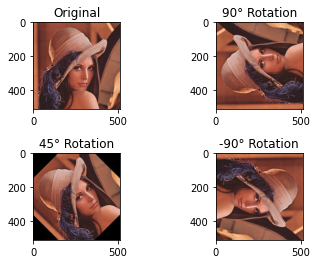

In [16]:
# Showing rotated images
figure, axes = plt.subplots(2, 2)

axes[0][0].set_title('Original')
axes[0][0].imshow(lena)

axes[0][1].set_title('90° Rotation')
axes[0][1].imshow(lena_rotated_90)

axes[1][0].set_title('45° Rotation')
axes[1][0].imshow(lena_rotated_45)

axes[1][1].set_title('-90° Rotation')
axes[1][1].imshow(lena_rotated_m90)

plt.subplots_adjust(hspace=.5)
plt.show()

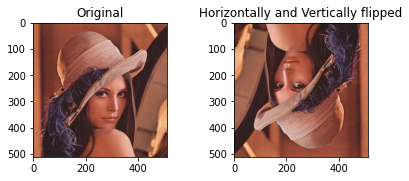

In [17]:
# Flipping horizontally and vertically
lena_hflipped = ImageOps.mirror(lena)
lena_hvflipped = ImageOps.flip(lena_hflipped)
lena_hvflipped.save('lena_hvflipped.png')

figure, axes = plt.subplots(1, 2)

axes[0].set_title('Original')
axes[0].imshow(lena)

axes[1].set_title('Horizontally and Vertically flipped')
axes[1].imshow(lena_hvflipped)

plt.subplots_adjust(wspace=.5)
plt.show()

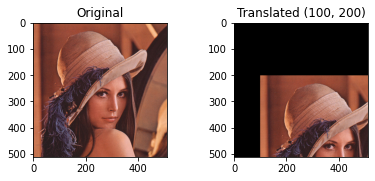

In [19]:
# Image translation along (100, 200)
lena = cv2.imread('lena.png')
translation_matrix = np.float32([[1, 0, 100], [0, 1, 200]])
lena_translated = cv2.warpAffine(lena, translation_matrix, lena.shape[:2])
cv2.imwrite('lena_translated.png', lena_translated)

figure, axes = plt.subplots(1, 2)

axes[0].set_title('Original')
axes[0].imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

axes[1].set_title('Translated (100, 200)')
axes[1].imshow(cv2.cvtColor(lena_translated, cv2.COLOR_BGR2RGB))

plt.subplots_adjust(wspace=.5)
plt.show()